<a href="https://colab.research.google.com/github/AgunsBaba/sales-prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#check row and column length
df.shape

(8523, 12)

In [6]:
#Check column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#get descriptive stats
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#import visualization modules
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


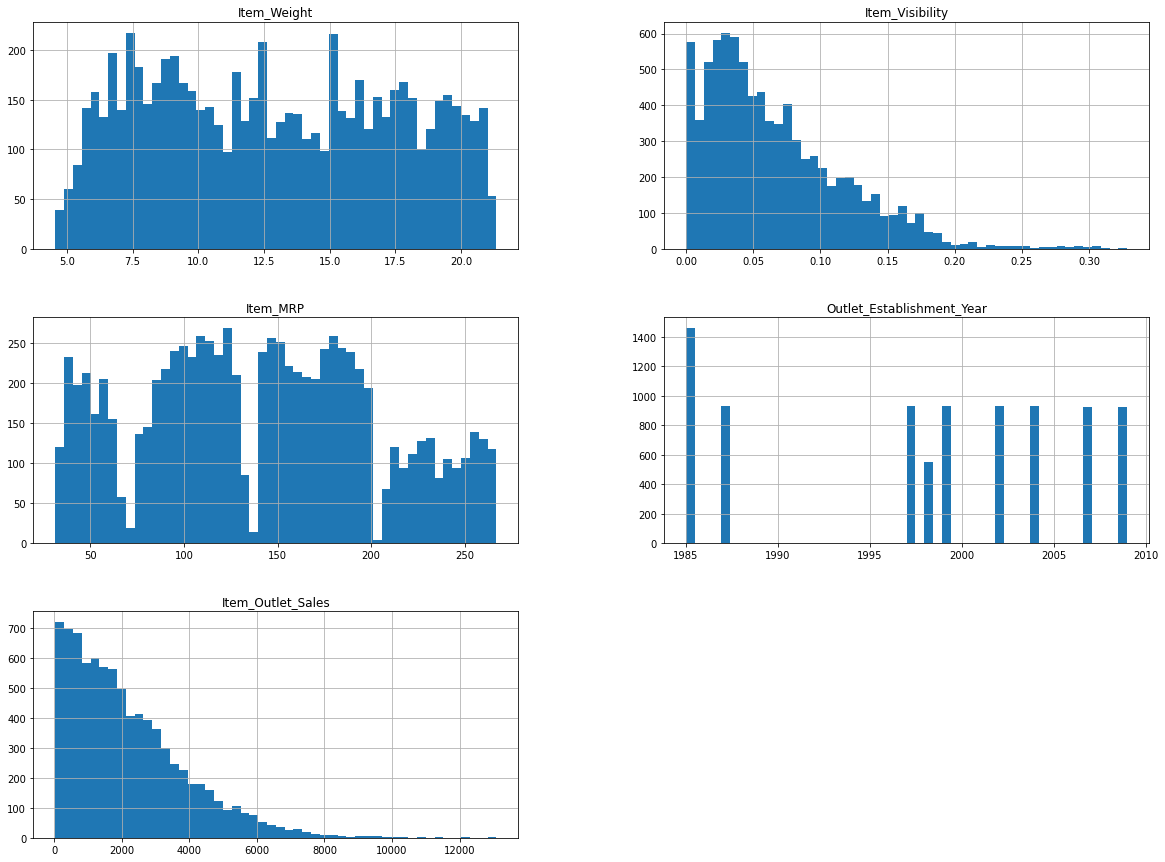

In [9]:
#show histogram of data to see the distribution of numeric variables
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
#find duplicates

df_duplicated = df[df.duplicated()]
print(df_duplicated)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


Nothing is duplicated

In [11]:
#Addressing missing value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#fill the missing Item_Weight by interpolation. 
#Repalcing missing values with interploation is better because it preserves the original shape/distribution of the data. 
#Using mean to fill the missing data distorts the data shape/distribution
df['Item_Weight'] = df['Item_Weight'].interpolate()

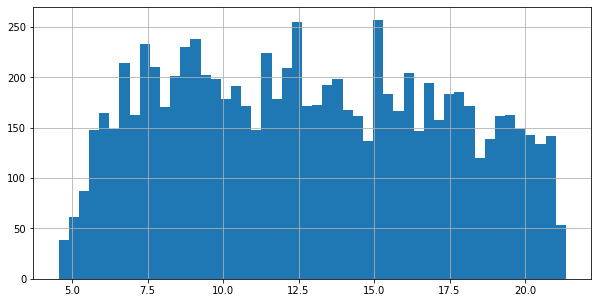

In [13]:
#histogram of Item_Weight to check that interploation has not distorted data distribution
df['Item_Weight'].hist(bins=50, figsize=(10,5))
plt.show()

In [14]:
#check that all null values in Item_Weight has been filled
df['Item_Weight'].isnull().sum()

0

In [15]:
#check value counts for the 'Outlet_Size'
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
#Calculate % of Medium, Small and High in the dataset to determine how many of each you will need in order to fill the missing values
perc_med = 2793 / 6113
perc_small = 2388/ 6113
perc_high = 932 / 6113
print(perc_med)
print(perc_small)
print(perc_high)

0.45689514150171767
0.3906428921969573
0.15246196630132505


Result indicates that we must fill the null values in Outlet_Size with ~ 46% 'Medium',~ 39% 'Small' and ~ 15% 'High'

In [18]:
#determine number of 'High', 'Small' and 'Medium' that we need
High = round(perc_high * 2410)
Medium = round(perc_med * 2410)
Small = round(perc_small * 2410)
print('we need to fill about', High, 'High')
print('we need to fill about', Medium, 'Medium')
print('we need to fill about', Small, 'Small')

we need to fill about 367 High
we need to fill about 1101 Medium
we need to fill about 941 Small


In [19]:
#sort dataframe by ascending order based on the Outlet_Size column.
#Sorting this way is necessary so that we can easily replace the null values in the Outlet_Size column
df = df.sort_values(by = 'Outlet_Size', ascending = False)
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850


In [20]:
#Beacuse we have sorted the dataframe in descending order, the null values in the Outlet_Size column are in rows 6113 to 8523.
#Repace the rows with the calculated number of High, Medium and Low that we need
df.iloc[6113:6482, 8] = 'High'
df.iloc[6483:7584, 8] = 'Medium'
df.iloc[7585:8523, 8] = 'Small'
df.Outlet_Size.value_counts()

Medium    3894
Small     3326
High      1301
Name: Outlet_Size, dtype: int64

In [21]:
#check to see if there are still null values in the Outlet_Size column
df = df.sort_values(by = 'Outlet_Size', ascending = False)
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2880,FDW52,14.00,Regular,0.037491,Frozen Foods,164.2526,OUT013,1987,High,Tier 3,Supermarket Type1,1808.9786
6557,FDL22,16.85,Low Fat,0.036360,Snack Foods,90.7488,OUT013,1987,High,Tier 3,Supermarket Type1,2263.7200
3207,FDP46,15.35,Low Fat,0.074554,Snack Foods,91.8830,OUT013,1987,High,Tier 3,Supermarket Type1,2606.6070
1288,FDL34,16.00,Low Fat,0.041029,Snack Foods,142.6496,OUT045,2002,NaN,Tier 2,Supermarket Type1,1834.9448
5142,FDN39,19.35,Regular,0.065891,Meat,167.0816,OUT017,2007,NaN,Tier 2,Supermarket Type1,1510.0344


In [22]:
#Repalce the remaining null values in the Outlet_Size column by 'High'
#Check if there are still null values
df.iloc[8521:8523, 8] = 'High'
df['Outlet_Size'].isnull().sum()

0

Result shows there are no more null values

Category names are Pythonic, so no need to change them

In [23]:
#Get descriptive statistics of the 'cleaned' dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.831222,0.066132,140.992782,1997.831867,2181.288914
std,4.445074,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.600000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
